In [17]:
import os

import numpy as np
import networkx as nx
import pandas as pd
import community
import matplotlib.pyplot as plt
import netwulf as nw
datapath = "..\data"

In [2]:
G_book = nx.read_gpickle(os.path.join(datapath, "book.nxgraph"))
G_reddit = nx.read_gpickle(os.path.join(datapath, "asoiaf_data_cleaned.nxgraph"))

# Perform community detection on the book graph

Modularity: 0.1687996641483092


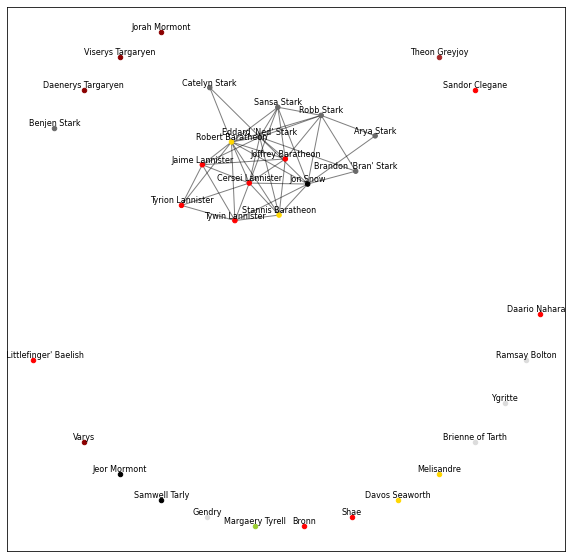

In [27]:
# Remove weaker edges from the graph
G_book_clean = G_book.copy()
book_weight_cutoff = 0.22
G_book_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_book_clean,'weight').items() if w < book_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_book_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_book_clean)
count = 0.
parts = []
for com, i in enumerate(set(partition.values())):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    parts.append(list_nodes)
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book_clean, parts)}")
nx.draw_networkx_edges(G_book_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_book_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Maybe the plots will look better in netwulf?
#new_G = nw.get_filtered_network(G_book_clean, node_group_key='colour')
#nw.visualize(new_G)

# Expected "optimal" split for the book graph

483
80
Modularity: 0.020718997512581713


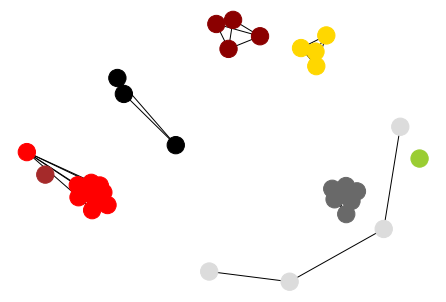

In [4]:
# Make list of sets, where each set is a grouping of a faction
node_color = [nx.get_node_attributes(G_book, "colour")[c] for c in G_book.nodes]
factions = pd.Series(range(len(node_color))).groupby(node_color, sort=False).apply(list).tolist()
for faction in factions:
    for i, index in enumerate(faction):
        faction[i] = list(G_book.nodes)[index]
#print(factions)

#partition = {}
#for i, faction in enumerate(factions):
#    for fact in faction:
#        partition[fact] = i
#print(partition)

G_book_faction = G_book.copy()
print(len(G_book.edges))
for a, b in G_book_faction.edges:
    same_faction = False
    for faction in factions:
        if a in faction and b in faction:
            same_faction = True
    if not same_faction:
        G_book_faction.remove_edge(a, b)
print(len(G_book_faction.edges))
print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book, factions)}")
nx.draw(G_book_faction, node_color = node_color)

# Community detection on the reddit graph

Modularity: 0.017772315072167626


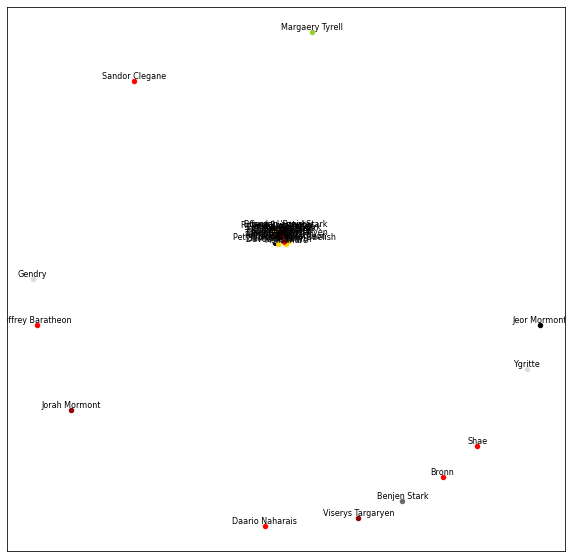

In [16]:
# Remove weaker edges from the graph
G_reddit_clean = G_reddit.copy()
reddit_weight_cutoff = 0.015
G_reddit_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_reddit_clean,'weight').items() if w < reddit_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_reddit_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_reddit_clean)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit_clean, parts)}")
nx.draw_networkx_edges(G_reddit_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_reddit_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Expected "optimal" split for the reddit graph

561
87
Modularity: 0.0066814363538822506


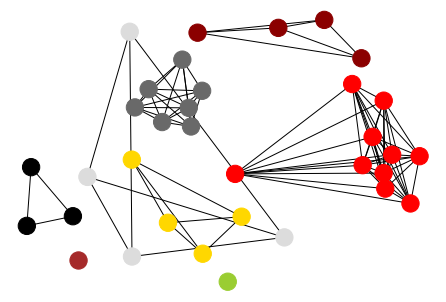

In [6]:
# Make list of sets, where each set is a grouping of a faction
node_color = [nx.get_node_attributes(G_reddit, "colour")[c] for c in G_reddit.nodes]
factions = pd.Series(range(len(node_color))).groupby(node_color, sort=False).apply(list).tolist()
for faction in factions:
    for i, index in enumerate(faction):
        faction[i] = list(G_reddit.nodes)[index]
#print(factions)

#partition = {}
#for i, faction in enumerate(factions):
#    for fact in faction:
#        partition[fact] = i
#print(partition)

G_reddit_faction = G_reddit.copy()
print(len(G_reddit.edges))
for a, b in G_reddit_faction.edges:
    same_faction = False
    for faction in factions:
        if a in faction and b in faction:
            same_faction = True
    if not same_faction:
        G_reddit_faction.remove_edge(a, b)
print(len(G_reddit_faction.edges))
print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit, factions)}")
nx.draw(G_reddit_faction, node_color = node_color)

#### Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
One of the tools we used to analyze the reddit and book graphs were community detection. This would allow us to test if characters are mentioned in relation to their factions/houses or if other factors play a bigger role e.g. if the most liked and disliked characters are mentioned more often in relation to other characters in general. 

The most essential methods used in our community detection analysis were python-louvain and modularity. Modularity explains how good the chosen graph partitioning is based on the relative density of nodes in communities compared to that of nodes outside of communities. The Louvain method optimizes this value using heuristics, since exhaustive search would get cumbersome quickly. Instead, Louvain iterates through two different steps; small communities are found by finding the optimal modularity locally for each nodes, after which each of these small communities are merged into one node.

This tool is great for the task of understanding how characters are actually related compared to how reddit talks about them and how we presume their relations look.

#### How did you use the tools to understand your dataset?
Since every single major character in the books were mentioned together in at least one chapter and in the subreddit were mentioned together in at least one post, we set a minimum weight to get the most significant links between nodes. Afterwards, we performed Louvain community detection, plottet the result and calculated the modularity for these partitions. These plots and modularities could then be compared to the "optimal" partitions, which in our minds would be that characters only relate to characters of the same faction. This assumption has multiple flaws but could still be expected to be seen at least somewhat in the plots.

From the two book plots, we see that the Lannisters and Starks have actually been grouped together like we see in the ground truth graph. The rest of the graph does not match particularly well with the ground truth, but we do see that characters like Jon Snow and Jeffrey Baratheon have a connection to the Starks and Lannisters, which makes sense in the context of the books. ***Kunne nok godt bruge noget hjælp til at lave konklusioner, når jeg ikke kender karakterrelationerne -.-***

***Konklusion of reddit data, da det ikke er helt nemt at se, hvordan nodes er blevet smidt sammen, når de er så squished***